# TimML Exercises
---
## Exercise 5: Impermeable walls

Impermeable walls may be modeled with line segments. Each impermeable wall is divided up in segments
and each segment is modeled with a `LineDoubletImp` element. The `LineDoubletImp` element has an option
called order. The no-flow condition is applied at order+1 control points along the segments. Between the
control points, the condition is met approximately. The modeler needs to verify whether the chosen lengths
of segments and orders results in an accurate solution. 

In the current implementation, order cannot be larger than 8, and it is recommended not to go higher than 5 unless really necessary. Impermeable walls can be placed in multiple layers by simply entering a list of layers using the keyword argument `layers = []`.

<img src="Exercise5_Temp.png">
#### Figure of the model

Consider an aquifer with a uniform flow from West to East. The aquifer is divided in four layers with
equal hydraulic conductivity; the model is created with the `Model3D` command. A square building pit is
surrounded by impermeable walls that extend halfway into the aquifer: they are placed in the top two model
layers. In the center of the building pit, a well is screened in the top aquifer. 

In [1]:
from timml import *
%matplotlib notebook

In [2]:
ml = Model3D([40, 30, 20, 10, 0])
uf = Uflow(ml, grad=0.01, angle=0)
rf = Constant(ml, xr=200, yr=0, head=50)
xp = [-100, 100, 100, -100, -100]
yp = [-100, -100, 100, 100, -100]
for i in range(len(xp) - 1):
    LineDoubletImp(ml, xp[i], yp[i], xp[i+1], yp[i+1], order=3, layers=[0, 1])
w = Well(ml, xw=0, yw=0, Qw=400, rw=0.1, layers=[0])

### Questions:
#### Exercise 5a
Solve the model.

In [3]:
ml.solve()

Starting solve
Number of elements:  7
Percent progress:  0  
size of matrix (33, 33)
Solution complete


#### Exercise 5b 
Make a contour plot for a window from $(x, y) = (−300,−300)$ to $(x, y) = (300, 300)$. Create contours of the top (layer=0) and bottom (layer=3) layers on the same graph.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


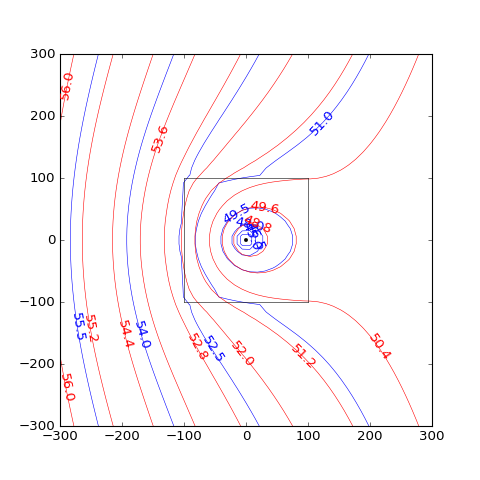

done with contouring
done with contouring


In [4]:
timcontour(ml, 
           xmin=-300, xmax=300, nx=50, 
           ymin=-300, ymax=300, ny=50, 
           labels=1, 
           labelfmt='%1.1f',
           layers=[0, 3],
           size=(6,6))

#### Exercise 5c
Create a contour plot with a vertical cross-section below it. Start a number of tracelines to see that water indeed flows around the impermeable wall.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


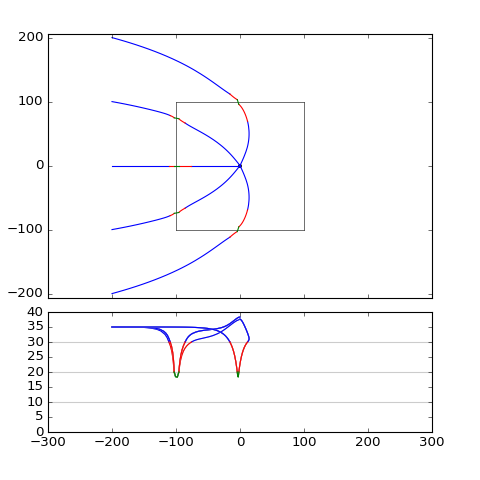

reached element of type well
reached element of type well
reached element of type well
reached element of type well
reached element of type well


In [5]:
timcontour(ml, 
           xmin=-300, xmax=300, nx=50, 
           ymin=-300, ymax=300, ny=50, 
           layers=0,
           xsec=True,
           size=(6,6))
timtracelines(ml, 
              xlist=[-200, -200, -200, -200, -200], 
              ylist=[-200, -100, 0, 100, 200], 
              zlist=[35, 35, 35, 35, 35], 
              step=10, 
              tmax=20 * 365.25, 
              xsec=True)